In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import date
import pandas_datareader as pdr
from pandas_datareader import data, wb

In [2]:
# Set the risk free rate
risk_free_rate = 0.05

### Acquire IBM and S&P500 data from Yahoo finance

In [4]:
# Acqurire the stock data from Yahoo Finance

start_date = "2010-01-01"
end_date = date.today()

ticker1 = "IBM"
ticker2 = "^GSPC"

stock1 = pdr.get_data_yahoo(ticker1, start_date, end_date)
stock2 = pdr.get_data_yahoo(ticker2, start_date, end_date)

In [7]:
# Take a peek at the histocial data of IBM
stock1.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,132.970001,130.850006,131.179993,132.449997,6155300.0,92.163887
2010-01-05,131.850006,130.100006,131.679993,130.850006,6841400.0,91.050545
2010-01-06,131.490005,129.809998,130.679993,130.000000,5605300.0,90.459076
2010-01-07,130.250000,128.910004,129.869995,129.550003,5840600.0,90.145927
2010-01-08,130.919998,129.050003,129.070007,130.850006,4197200.0,91.050545


In [8]:
# Take a peek at the historical data of S&P 500
stock2.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,1133.869995,1116.560059,1116.560059,1132.989990,3991400000,1132.989990
2010-01-05,1136.630005,1129.660034,1132.660034,1136.520020,2491020000,1136.520020
2010-01-06,1139.189941,1133.949951,1135.709961,1137.140015,4972660000,1137.140015
2010-01-07,1142.459961,1131.319946,1136.270020,1141.689941,5270680000,1141.689941
2010-01-08,1145.390015,1136.219971,1140.520020,1144.979980,4389590000,1144.979980


### Visualize the stock data

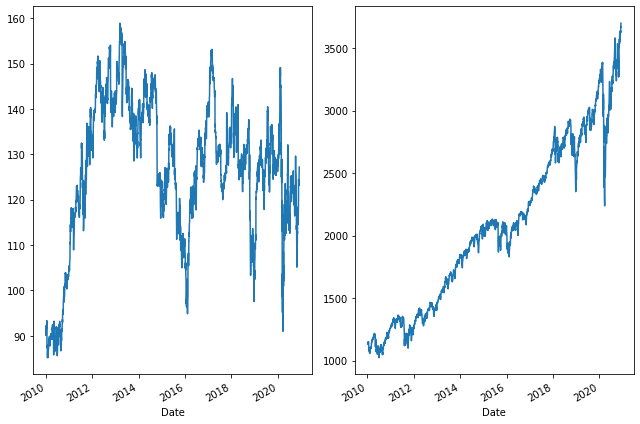

In [27]:
# Visualize the adjusted closing price of IBM stock

plt.figure(figsize=(9,6))

plt.subplot(121)
stock1['Adj Close'].plot()

plt.subplot(122)
stock2['Adj Close'].plot()

plt.tight_layout()
plt.show()

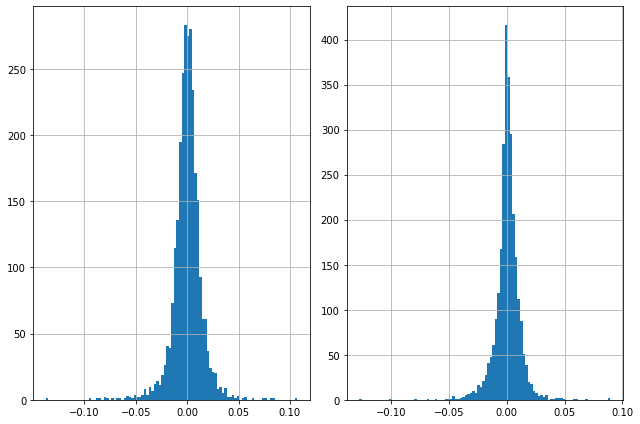

In [25]:
# Visualize the distribution of the daily returns using histograms

returns1 = np.log(stock1['Adj Close']/stock1['Adj Close'].shift(1))
returns2 = np.log(stock2['Adj Close']/stock2['Adj Close'].shift(1))

plt.figure(figsize=(9,6))

plt.subplot(121)
returns1.hist(bins=100)

plt.subplot(122)
returns2.hist(bins=100)

plt.tight_layout()
plt.show()

### Compute monthly returns

In [29]:
# Resample monthly and take the last

return_stock1 = stock1.resample("M").last()
return_stock2 = stock2.resample("M").last()

# Take a peek at resampled stock data of IBM
return_stock1.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-31,125.000000,121.900002,124.320000,122.389999,11571200.0,85.163742
2010-02-28,128.000000,126.739998,127.010002,127.160004,4784200.0,88.878677
2010-03-31,128.750000,127.650002,128.229996,128.250000,4904800.0,89.640518
2010-04-30,130.639999,128.839996,130.429993,129.000000,6266700.0,90.164726
2010-05-31,126.279999,124.290001,125.959999,125.260002,7421900.0,87.999435


In [72]:
# Create a dataframe containing the adjusted closing prices of the two stocks

data = pd.DataFrame({'s_adjclose': return_stock1['Adj Close'],
                     'm_adjclose': return_stock2['Adj Close']},
                    index = return_stock1.index)

# Take a peek at the dataframe
data.head()

,s_adjclose,m_adjclose
Date,,
2010-01-31,85.163742,1073.869995
2010-02-28,88.878677,1104.489990
2010-03-31,89.640518,1169.430054
2010-04-30,90.164726,1186.689941
2010-05-31,87.999435,1089.410034


In [73]:
# Compute the monthly returns
data[['s_returns', 'm_returns']] = np.log(data/data.shift(1))

# Drop the null values
data = data.dropna()

# Take a peek at the data
data.head()

,s_adjclose,m_adjclose,s_returns,m_returns
Date,,,,
2010-02-28,88.878677,1104.489990,0.042696,0.028115
2010-03-31,89.640518,1169.430054,0.008535,0.057133
2010-04-30,90.164726,1186.689941,0.005831,0.014651
2010-05-31,87.999435,1089.410034,-0.024308,-0.085532
2010-06-30,86.748894,1030.709961,-0.014313,-0.055388


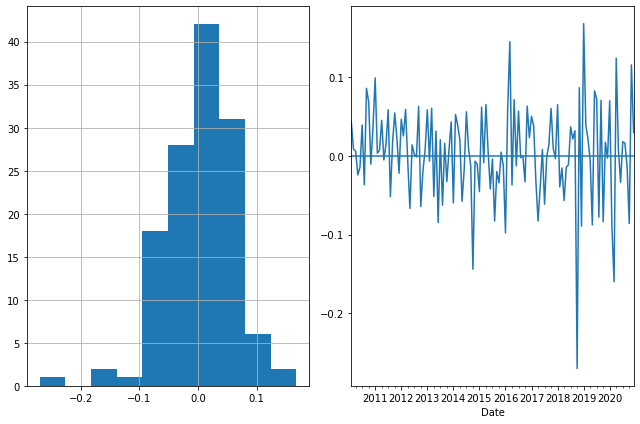

In [74]:
# Visualize the monthly returns of the IBM stock data

plt.figure(figsize=(9,6))

plt.subplot(121)
data.s_returns.hist()

plt.subplot(122)
data.s_returns.plot()
plt.axhline(y=0)

plt.tight_layout()
plt.show()

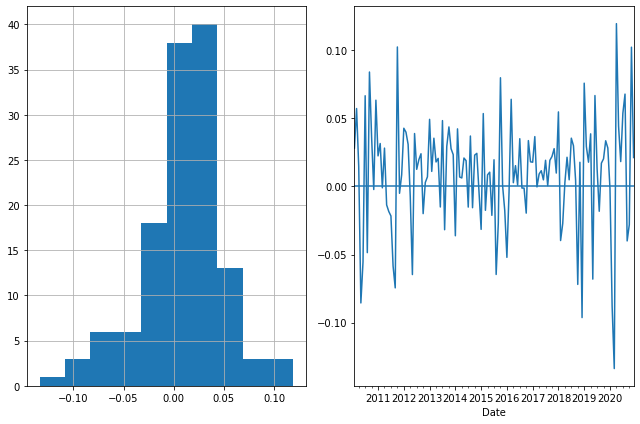

In [75]:
# Visualize the monthly returns of the S&P 500 stock data

plt.figure(figsize=(9,6))

plt.subplot(121)
data.m_returns.hist()

plt.subplot(122)
data.m_returns.plot()
plt.axhline(y=0)

plt.tight_layout()
plt.show()

### Compute the covariance matrix

In [76]:
covmat = np.cov(data.s_returns, data.m_returns)
covmat

array([[0.00352694, 0.00157412],
       [0.00157412, 0.00163625]])

### Compute beta using covariance matrix

In [77]:
beta = covmat[0,1]/covmat[1,1]
beta

0.9620318091118423

### Compute the beta using linear regression

In [79]:
beta, alpha = np.polyfit(x=data.m_returns, y=data.s_returns, deg=1)
print("Beta from regression: ", beta)
print("Alpha from regression: ", alpha)

Beta from regression:  0.9620318091118422
Alpha from regression:  -0.006020466795613338


### Visualization

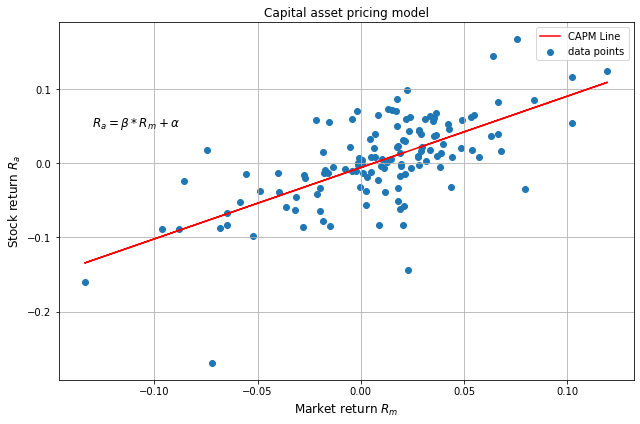

In [97]:
fig, ax = plt.subplots(1, figsize=(9,6))

ax.scatter(x=data.m_returns, y=data.s_returns, label="data points")
ax.plot(data.m_returns, beta*data.m_returns+alpha, color='red', label="CAPM Line")
plt.title("Capital asset pricing model")
plt.xlabel("Market return $R_m$", fontsize=12)
plt.ylabel("Stock return $R_a$", fontsize=12)
plt.text(-0.13, 0.05, r'$R_a = \beta * R_m + \alpha$', fontsize=12)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()